## Importing the Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import librosa
import scipy 
from scipy.io import wavfile
import IPython.display as ipd
import os

## Loading the Exports from RawPower

In [5]:
arpeggio_path =  "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\1 Arpeggio\Arpeggio_rms_exp.xlsx"
strumming_path = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\2 Strumming\Strumming_rms_exp.xlsx"
bending_path = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\3 Bending\Bending_rms_exp.xlsx"
pullOffHammerOn_path = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\4 PullOffHammerOn\PullOffHammerOn_rms_exp.xlsx"
tapping_path = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\5 Tapping\\tapping_rms_exp.xlsx"
strongPick_path = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\6 StrongPick\\strongPick_rms_exp.xlsx"
doublePick_path = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\7 DoublePick\\doublePick_rms_exp.xlsx"

sheet= "Sheet1" #exel sheet name

dataFrame_arpeggio = pd.read_excel(io=arpeggio_path, sheet_name=sheet)
dataFrame_strumming = pd.read_excel(io=strumming_path, sheet_name=sheet)
dataFrame_bending = pd.read_excel(io=bending_path, sheet_name=sheet)
dataFrame_pullOffHammerOn= pd.read_excel(io=pullOffHammerOn_path, sheet_name=sheet)
dataFrame_tapping = pd.read_excel(io=tapping_path, sheet_name=sheet)
dataFrame_strongPick = pd.read_excel(io=strongPick_path, sheet_name=sheet)
dataFrame_doublePick = pd.read_excel(io=doublePick_path, sheet_name=sheet)

## Creation of muscle arrays 

In [ ]:
""" Covertin from pandas dataframe to numpy array """
npdf_arpeggio = np.asarray(dataFrame_arpeggio) 

npdf_strumming = np.asarray(dataFrame_strumming)
npdf_bending = np.asarray(dataFrame_bending) 
npdf_pullOffHammerOn = np.asarray(dataFrame_pullOffHammerOn) 
npdf_tapping = np.asarray(dataFrame_tapping) 
npdf_strongPick = np.asarray(dataFrame_strongPick) 
npdf_doublePick = np.asarray(dataFrame_doublePick) 




#print("npdf_arpeggio = \n{}".format(npdf_arpeggio[1:20, 1:10])) #Cosa serve sta roba??

Arpeggio instants:  39447 prima riga:  39448 39447
[[datetime.time(0, 0, 0, 100000) 1784.575963813879 1640.569678242955 ...
  626.9583003154058 4639.29519332215 1974.503960782523]
 [datetime.time(0, 0, 0, 101000) 1785.05361577663 1642.970284714473 ...
  626.9709458583287 4642.497222187296 1975.545964579824]
 [datetime.time(0, 0, 0, 102000) 1785.076979730529 1655.773619724744 ...
  627.0245730857814 4647.722515781948 1979.651530727874]
 ...
 [datetime.time(0, 0, 39, 616000) 1490.639900636029 1632.574598725384 ...
  1396.467573321951 2475.35735449048 2839.968468096823]
 [datetime.time(0, 0, 39, 617000) 1514.036689554462 1640.13376640822 ...
  1396.640403118931 2481.680419660875 2850.957414292894]
 [datetime.time(0, 0, 39, 618000) 1530.800996868604 1635.123016217569 ...
  1397.795691631658 2484.824492347035 2846.892310530698]]


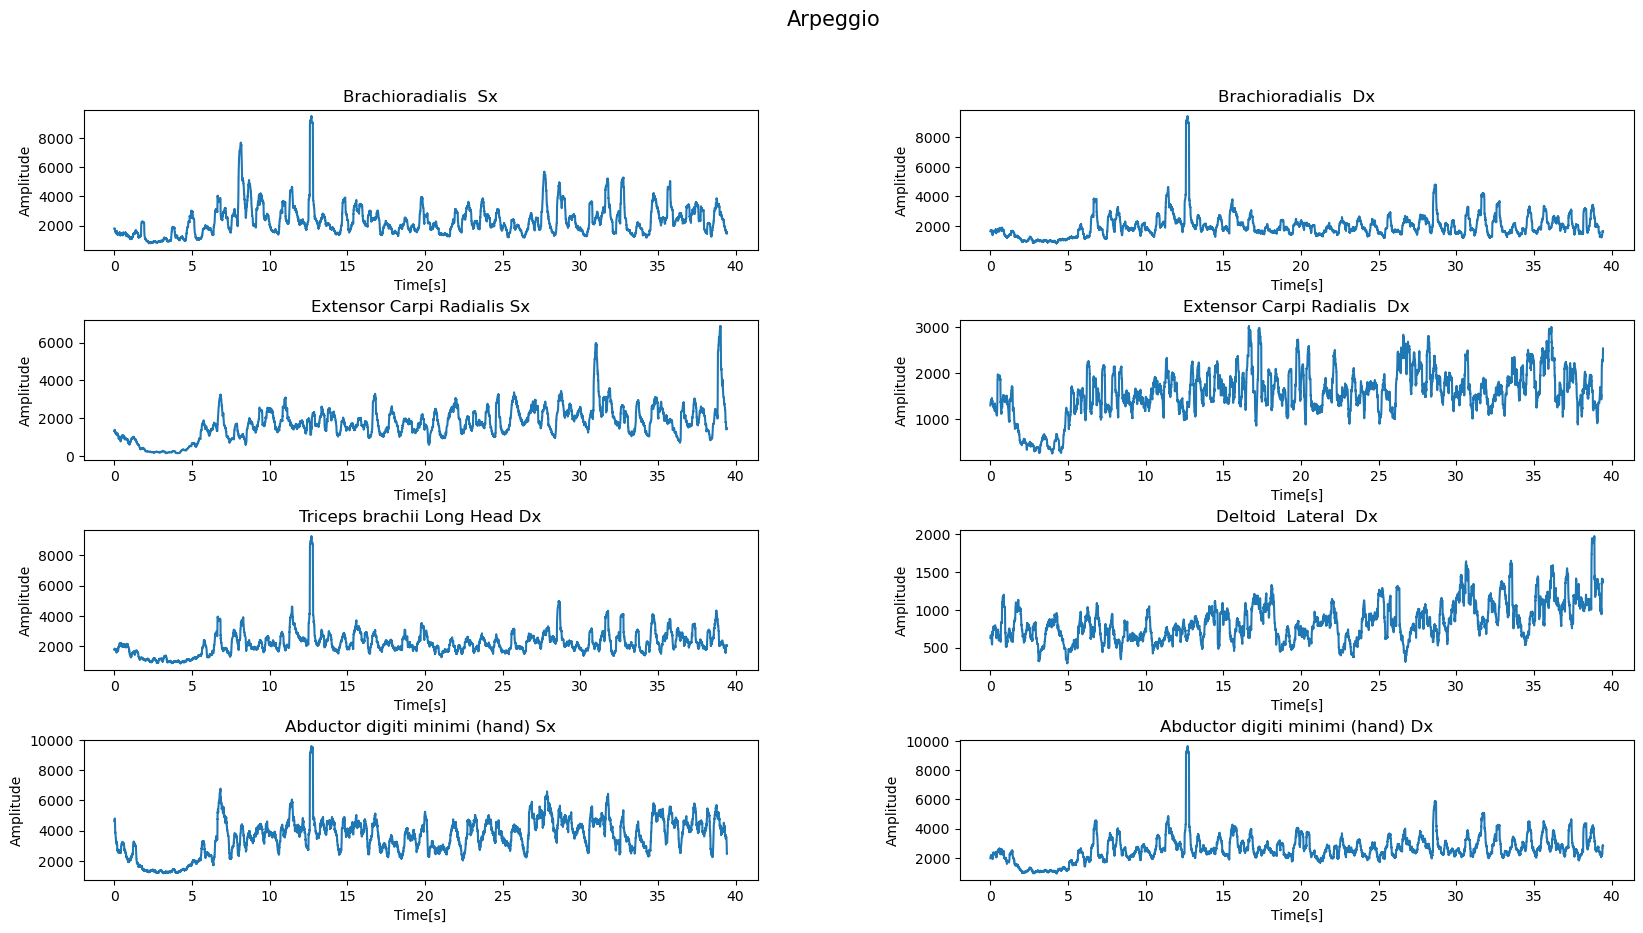

In [57]:
fs= 1000 #Hz
Ts= 1/fs #sampling Time
muscles= ['Brachioradialis  Sx', 
          'Brachioradialis  Dx',
          'Extensor Carpi Radialis Sx',
          'Extensor Carpi Radialis  Dx',
          'Triceps brachii Long Head Dx', 
          'Deltoid  Lateral  Dx',
          'Abductor digiti minimi (hand) Sx',
          'Abductor digiti minimi (hand) Dx']

arpeggio_lenght = npdf_arpeggio.shape[0] - 1
arpeggio_duration= Ts *arpeggio_lenght
arpeggio_istants= np.arange(0, arpeggio_lenght)* Ts

#devo trovare un modo per plottare tutti e 8 i canali in un unico plot 
print("Arpeggio instants: ", len(arpeggio_istants), "prima riga: ",  npdf_arpeggio.shape[0], len(npdf_arpeggio.T[1, 1:]) )
fig = plt.figure(figsize=(20,10))
fig.suptitle("Arpeggio", fontsize=15)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    ax.plot(arpeggio_istants, npdf_arpeggio.T[i, 1:])
    plt.ylabel('Amplitude')
    plt.xlabel('Time[s]')
    plt.title(muscles[i-1])
#print(arpeggio_lenght, strumming_lenght)
print(npdf_arpeggio)

KeyError: 1

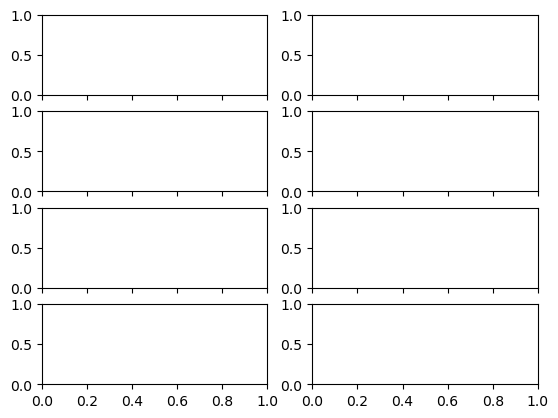

In [54]:
from scipy.signal import butter, lfilter, peak_widths, peak_prominences
import peakutils
def butter_bandpass(lowcut, highcut, fs, order):
    """returns butterworth filter coefficients
    
    Args:
        lowcut(int,float): low cutoff frequency
        highcut(int,float): high cutoff frequency
        fs(int): sampling frequency
        order(int,optional): order of the filter, default value {5}
 
    Returns: 
        ndarray: Numerator polynomials of the IIR filter
    Returns:
        ndarray: Denominator polynomials of the IIR filter
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    """returns the filtered signal after butterworth filter is applied
    
    Args:
        data (array_like): original signal
        lowcut(int,float): low cutoff frequency
        highcut(int,float): high cutoff frequency
        fs(int): sampling frequency
        order(int,optional): order of the filter, default value {3}

    Returns:
        array_like: output of the digital filter
    """
    b , a = butter_bandpass(lowcut, highcut, fs, order)
    #b= int(b)
    #a= int(a)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=2):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=2)
    y = lfilter(b, a, data)
    return y

def treshold_detection(data):
    #data = data[treshold_start:treshold_end]
    # data = data[35:85]
    data.index = range(0, data.shape[0])
    mean = data.mean()
    std = data.std()
    cost = 10
    treshold = mean + cost*std
    return treshold

nrows=2
ncols=4
fig, axs = plt.subplots(nrows=4,ncols=2, sharex=True) #When stacking in two directions, the returned axs is a 2D NumPy array.
rel_height = 0.96
def TKEO_processing(data, muscle_to_plot, relative_height, i_plot, j_plot):
    """
    returns the filtered signal after TKEO filtering
    
    Args:
        data (array_like): original signal
        muscle_to_plot (list of string): list of muscles for the plotting 
        relative_height(..): bho non lo so 
    Returns:
        peaks_found: list of couple muscle-num_peaks_found 
        left_ips1: 
        right_ips1: 
       
    """
    #npArrayData= np.asarray(data[1:])
    #data.index = range(0, data.shape[0])

    # BUTTER BANDPASS
    data_bandpass = butter_bandpass_filter(data, 20, 499, 1000, 3)
    data_bandpass = pd.DataFrame(data_bandpass, columns=[muscle_to_plot])
    
    # TKEO
    data_TKEO = []
    for i in range (1, len(data_bandpass)-1):
        tkeo_i = pow(data_bandpass[muscle_to_plot][i], 2) - data_bandpass[muscle_to_plot][i-1]*data_bandpass[muscle_to_plot][i+1]
        data_TKEO.append(tkeo_i)

    data_TKEO = pd.DataFrame(data_TKEO, columns=[muscle_to_plot])
    # RECTIFICATION
    data_TKEO = abs(data_TKEO)

    # LOW PASS FILTER 50 Hz 2nd Order
    data_TKEO_filtered = butter_lowpass_filter(data_TKEO, 50, 1000)
    data_TKEO_filtered = pd.DataFrame(data_TKEO_filtered, columns=[muscle_to_plot])

    # MOVING AVERAGE
    data_TKEO_filtered = pd.DataFrame.rolling(data_TKEO_filtered, 500).mean()

    # TRESHOLD
    height_threshold = np.round(treshold_detection(data_TKEO_filtered))

    peaks_found = peakutils.peak.indexes(data_TKEO_filtered[muscle_to_plot], thres_abs=True, thres=int(height_threshold), min_dist=9000)
    average_pf1 = np.mean(data_TKEO_filtered[muscle_to_plot][peaks_found])

    print('PEAKS FOUND: ', muscle_to_plot, '\t', len(peaks_found))
    # print(df_ErectorSpinaeSx[muscle_to_plot][peaks_found])
    axs[i_plot, j_plot].plot(data_TKEO_filtered[muscle_to_plot])
    axs[i_plot, j_plot].plot(peaks_found, data_TKEO_filtered[muscle_to_plot][peaks_found], 'x')
    axs[i_plot, j_plot].plot(np.full_like(data_TKEO_filtered, height_threshold), "--", color="gray")
    axs[i_plot, j_plot].set_title(muscle_to_plot)

    prominences, left_bases, right_bases = peak_prominences(data_TKEO_filtered[muscle_to_plot], peaks_found)
    widths, h_eval, left_ips1, right_ips1 = peak_widths(
        data_TKEO_filtered[muscle_to_plot], peaks_found, 
        rel_height=relative_height,
        prominence_data=(prominences, left_bases, right_bases)
    )
    for i in range (0, len(h_eval)):
        axs[i_plot, j_plot].hlines(y=h_eval[i], xmin=left_ips1[i], xmax=right_ips1[i], color="blue")

    axs[i_plot, j_plot].plot(data_TKEO_filtered)
    print("left ips1: ",left_ips1,"right ips1: ", right_ips1)
    return peaks_found, left_ips1, right_ips1

takeo_peaks_position = TKEO_processing(npdf_arpeggio[1:,1:], muscles, rel_height, nrows, ncols)